In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Importing the dataset
df = pd.read_csv("ingredient.csv")
df.head()

,a,b,c,d,e,f,g,h,i
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00


In [3]:
df.describe()

,a,b,c,d,e,f,g,h,i
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


<Axes: >

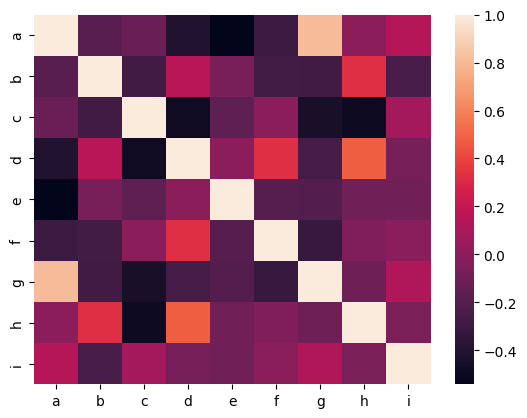

In [24]:
sns.heatmap(df.corr())


<li>a correlation with g (0.8)
<li>b correlation with h (0.3)
<li>c correlation with i (0.08)
<li>d correlation with c(-0.4) and h (0.47)
<li>e correlation with a (-0.542052)
<li>f correlation with d(0.3)
<li>i correlation with a(0.14)
<li>g correlation with a(0.8)
<li>h correlation with d(0.4)

In [36]:
df.corr()['a'].sort_values(ascending=False)
df.corr()['b'].sort_values(ascending=False)
df.corr()['c'].sort_values(ascending=False)
df.corr()['d'].sort_values(ascending=False)
df.corr()['e'].sort_values(ascending=False)
df.corr()['f'].sort_values(ascending=False)
df.corr()['i'].sort_values(ascending=False)
df.corr()['g'].sort_values(ascending=False)
df.corr()['h'].sort_values(ascending=False)



h    1.000000
d    0.479404
b    0.326603
a   -0.000386
f   -0.042618
i   -0.058692
e   -0.102151
g   -0.112841
c   -0.492262
Name: h, dtype: float64

Taking the correlation >0,5 or <-0.5

<Axes: xlabel='a', ylabel='g'>

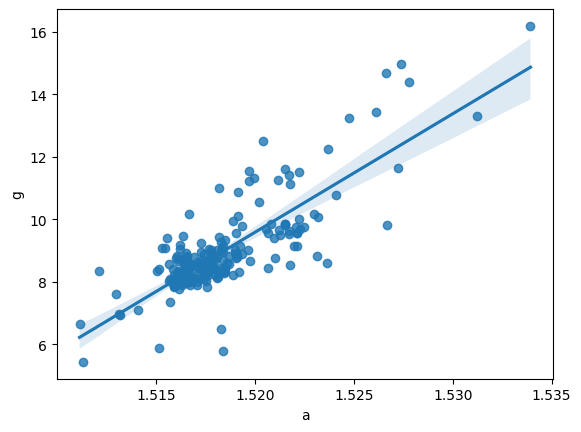

In [42]:
# Plotting a with g
sns.regplot(data=df,x='a',y='g')
# it can be seen that when a goes up g goes up too

<Axes: xlabel='a', ylabel='e'>

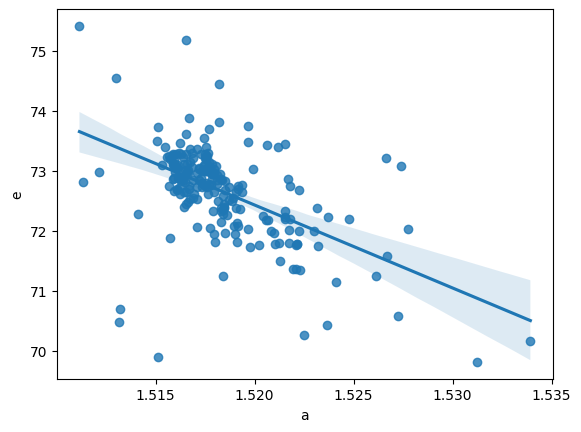

In [43]:
sns.regplot(data=df,x='a',y='e')
# it can be seen that when a gets higher e gets lower

Distribution Study

<Axes: xlabel='a', ylabel='Count'>

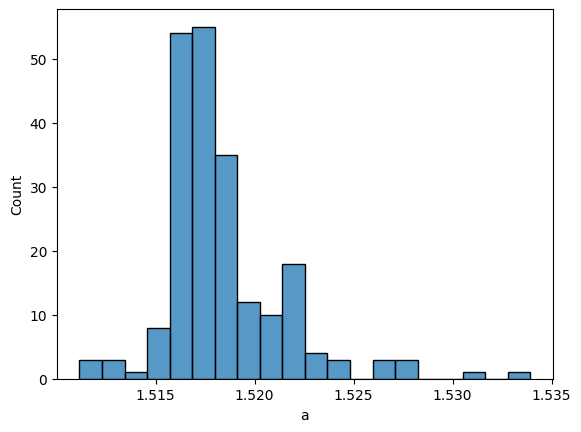

In [51]:
# A distribution study
sns.histplot(data=df,x="a",bins=20)

<Axes: xlabel='e', ylabel='Count'>

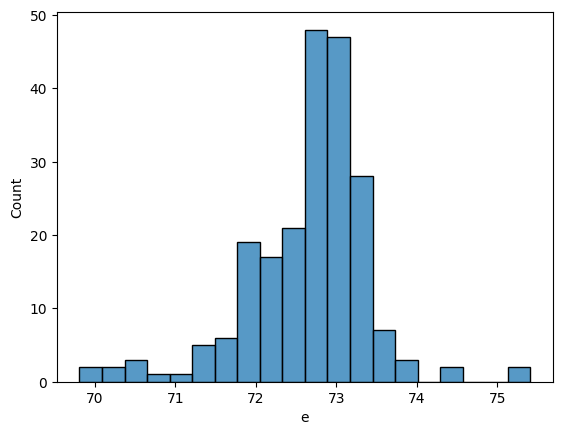

In [54]:
sns.histplot(data=df,x="e",bins=20)

<Axes: xlabel='g', ylabel='Count'>

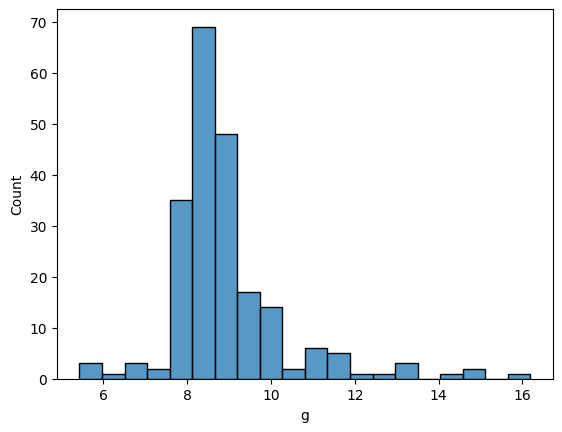

In [55]:
sns.histplot(data=df,x="g",bins=20)

<Axes: xlabel='a'>

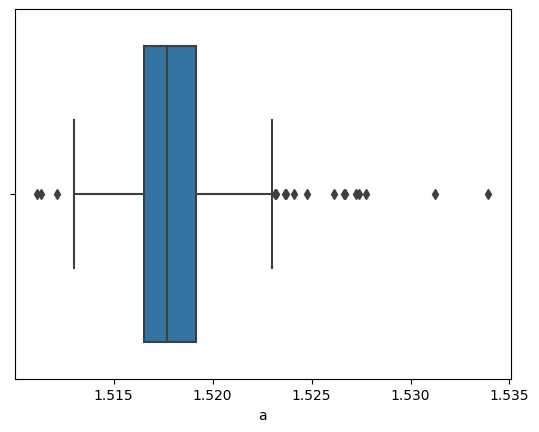

In [52]:
sns.boxplot(data=df,x="a")

<Axes: xlabel='e'>

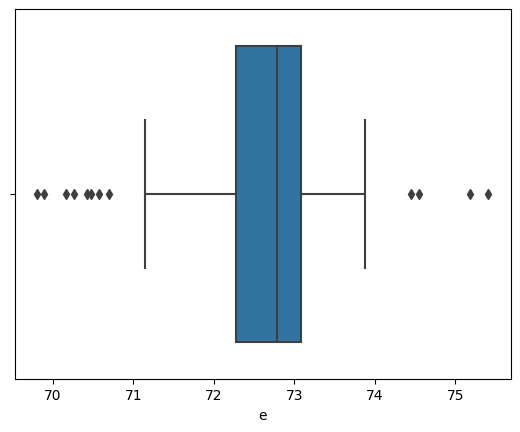

In [53]:
sns.boxplot(data=df,x="e")

<Axes: xlabel='g'>

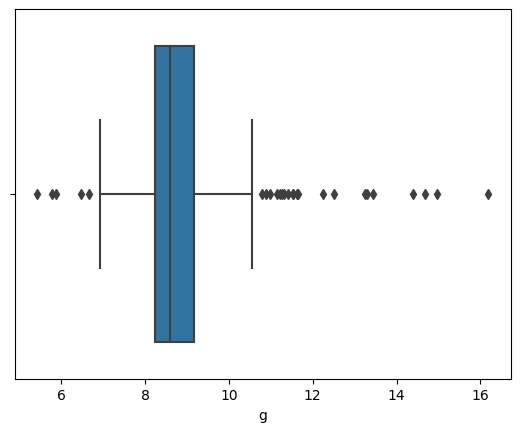

In [56]:
sns.boxplot(data=df,x="g")

We can see that from the describe and the graph that a has the least std which mean it didnt vary so far although it still have outlier which can be used as parameter

Clustering Test

In [62]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import calinski_harabasz_score


# Extract numerical columns for clustering
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
data_for_clustering = df[numeric_columns]

# Standardize the data (important for k-means)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

# Choose a range of clusters to evaluate
min_clusters = 2
max_clusters = 10

# Create a dictionary to store Calinski-Harabasz scores for different cluster numbers
ch_scores = {}

# Iterate over different numbers of clusters
for n_clusters in range(min_clusters, max_clusters + 1):
    # Apply k-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_data)
    
    # Calculate Calinski-Harabasz score and store it in the dictionary
    ch_score = calinski_harabasz_score(scaled_data, kmeans.labels_)
    ch_scores[n_clusters] = ch_score

# Print the Calinski-Harabasz scores for different numbers of clusters
for n_clusters, score in ch_scores.items():
    print(f"Number of Clusters: {n_clusters}, Calinski-Harabasz Score: {score}")


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

Number of Clusters: 2, Calinski-Harabasz Score: 53.551513777688065
Number of Clusters: 3, Calinski-Harabasz Score: 58.28794277829252
Number of Clusters: 4, Calinski-Harabasz Score: 57.49970683216742
Number of Clusters: 5, Calinski-Harabasz Score: 61.19817771231915
Number of Clusters: 6, Calinski-Harabasz Score: 62.58716985760171
Number of Clusters: 7, Calinski-Harabasz Score: 62.81291378866267
Number of Clusters: 8, Calinski-Harabasz Score: 63.2559855766834
Number of Clusters: 9, Calinski-Harabasz Score: 62.520174364972135
Number of Clusters: 10, Calinski-Harabasz Score: 60.593036171132574


since 8 cluster produce the highest score therefore from this method it is concluded that 8 cluster is the best size

Q2 Palm Tree

In [5]:
# Based on the research that is conducted the oil palm in the world is affected by the climate change 
# so we can assume that the Climate change is identified as a significant factor affecting oil palm yield. 
# Changes in climate conditions can highly impact the photosynthetic efficiency of oil palm, directly influencing yield.

In [6]:
df2 = pd.read_csv("palm_ffb.csv")
df2.head()

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44


In [7]:
df2.describe()

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,527.646923,26.849918,21.379231,33.851538,188.980769,24.753846,793404.491565,1.602231
std,57.367844,0.651413,0.688971,1.079638,80.237210,1.239289,34440.893854,0.281751
min,380.700000,25.158065,18.900000,31.100000,2.000000,21.000000,683431.944400,1.080000
25%,488.625000,26.442285,21.000000,33.100000,140.300000,24.000000,768966.949100,1.390000
50%,538.300000,26.930645,21.500000,33.900000,182.150000,25.000000,790036.158050,1.585000
75%,571.025000,27.270726,21.800000,34.600000,226.100000,26.000000,821989.235250,1.807500
max,647.300000,28.580000,22.600000,36.000000,496.100000,27.000000,882254.225400,2.270000


In [8]:
df2.corr()


,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
SoilMoisture,1.000000,-0.649878,0.015839,-0.499936,0.552001,-0.057015,-0.326539,-0.003183
Average_Temp,-0.649878,1.000000,0.180396,0.761083,-0.369386,0.076321,0.446515,-0.005494
Min_Temp,0.015839,0.180396,1.000000,-0.124754,0.345944,0.068414,0.024396,0.103830
Max_Temp,-0.499936,0.761083,-0.124754,1.000000,-0.461117,-0.039112,0.314827,-0.071201
Precipitation,0.552001,-0.369386,0.345944,-0.461117,1.000000,0.127897,-0.265866,0.289604
Working_days,-0.057015,0.076321,0.068414,-0.039112,0.127897,1.000000,0.048876,0.116364
HA_Harvested,-0.326539,0.446515,0.024396,0.314827,-0.265866,0.048876,1.000000,-0.350222
FFB_Yield,-0.003183,-0.005494,0.103830,-0.071201,0.289604,0.116364,-0.350222,1.000000


In [9]:
df2.corr()['FFB_Yield'].sort_values(ascending=False)

FFB_Yield        1.000000
Precipitation    0.289604
Working_days     0.116364
Min_Temp         0.103830
SoilMoisture    -0.003183
Average_Temp    -0.005494
Max_Temp        -0.071201
HA_Harvested    -0.350222
Name: FFB_Yield, dtype: float64

In [10]:
df2

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44
...,...,...,...,...,...,...,...,...,...
125,01.06.2018,498.2,27.213333,21.6,33.6,165.6,24,820758.9147,1.29
126,01.07.2018,494.7,27.074194,21.2,33.5,154.7,26,882254.2254,1.42
127,01.08.2018,478.8,27.016129,20.4,33.6,127.2,25,829488.8199,1.61
128,01.09.2018,481.1,26.946667,21.0,34.2,180.6,23,792101.0471,1.91


<Axes: xlabel='HA_Harvested', ylabel='FFB_Yield'>

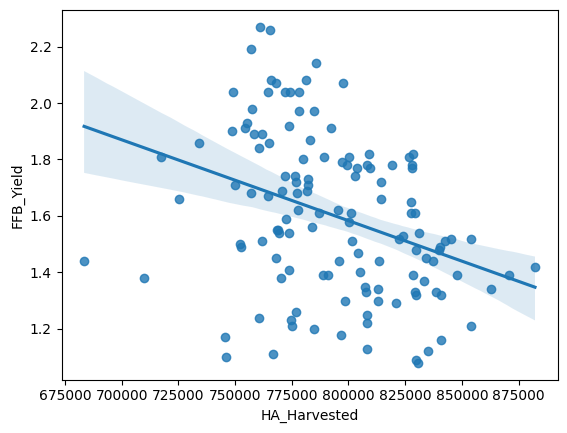

In [11]:
# The HA Harvested against the Yield
sns.regplot(y=df2['FFB_Yield'],x=df2['HA_Harvested'])

<Axes: xlabel='Precipitation', ylabel='FFB_Yield'>

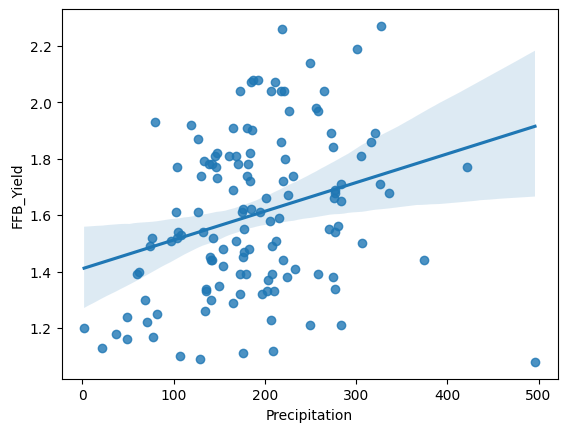

In [12]:
# The connection between Precipitation against the Yield
sns.regplot(y=df2['FFB_Yield'],x=df2['Precipitation'])

<Axes: >

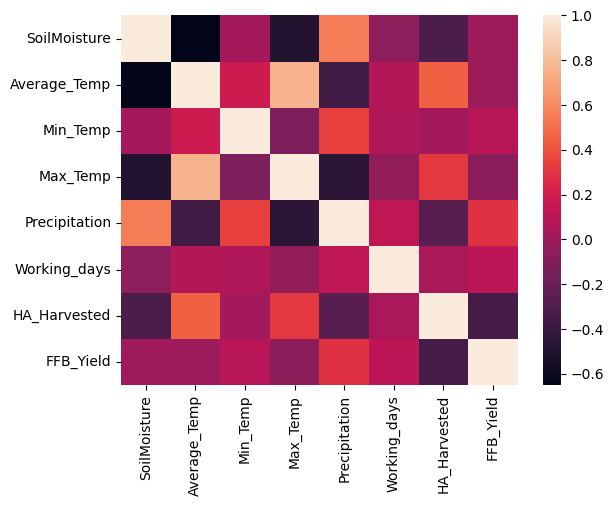

In [13]:
sns.heatmap(df2.corr())

In [14]:
# Correlation between the 
df2['Precipitation'].corr(df2['HA_Harvested'])

-0.2658658286299536

In [15]:
df2.corr()['HA_Harvested'].sort_values(ascending=False)

HA_Harvested     1.000000
Average_Temp     0.446515
Max_Temp         0.314827
Working_days     0.048876
Min_Temp         0.024396
Precipitation   -0.265866
SoilMoisture    -0.326539
FFB_Yield       -0.350222
Name: HA_Harvested, dtype: float64

In [16]:
df2.corr()['Average_Temp'].sort_values(ascending=False)

Average_Temp     1.000000
Max_Temp         0.761083
HA_Harvested     0.446515
Min_Temp         0.180396
Working_days     0.076321
FFB_Yield       -0.005494
Precipitation   -0.369386
SoilMoisture    -0.649878
Name: Average_Temp, dtype: float64

In [17]:
df2.corr()['SoilMoisture'].sort_values(ascending=False)

SoilMoisture     1.000000
Precipitation    0.552001
Min_Temp         0.015839
FFB_Yield       -0.003183
Working_days    -0.057015
HA_Harvested    -0.326539
Max_Temp        -0.499936
Average_Temp    -0.649878
Name: SoilMoisture, dtype: float64

In [18]:
df2.corr()['Precipitation'].sort_values(ascending=False)

Precipitation    1.000000
SoilMoisture     0.552001
Min_Temp         0.345944
FFB_Yield        0.289604
Working_days     0.127897
HA_Harvested    -0.265866
Average_Temp    -0.369386
Max_Temp        -0.461117
Name: Precipitation, dtype: float64

Found out that Average Temp effect the HA Harvested

<Axes: xlabel='Average_Temp', ylabel='HA_Harvested'>

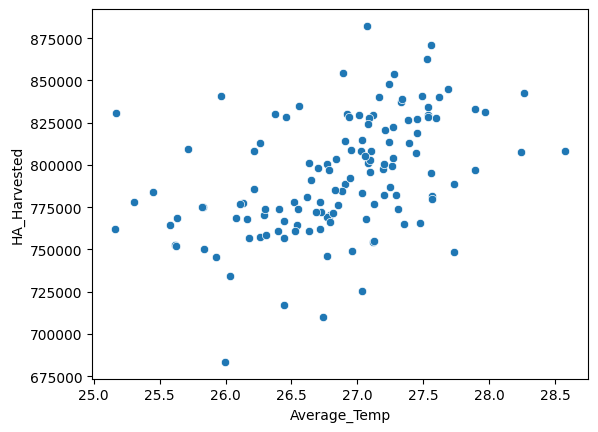

In [19]:
sns.scatterplot(data=df2, x= "Average_Temp",y="HA_Harvested")

Outlier Analysis

<Axes: >

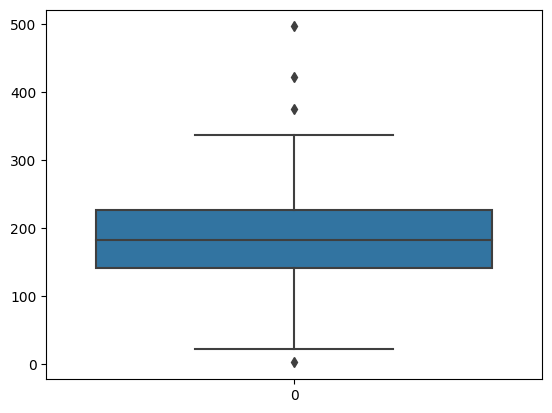

In [20]:
sns.boxplot(df2['Precipitation'])

<Axes: >

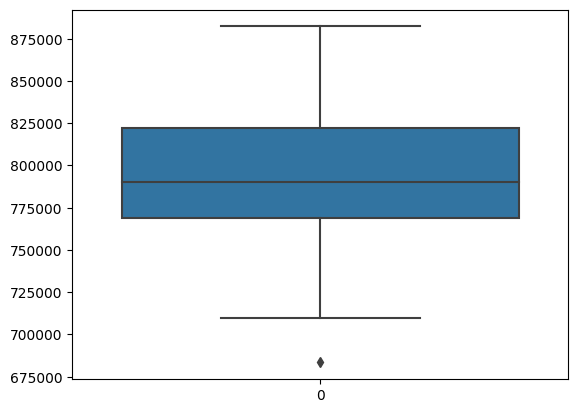

In [21]:
sns.boxplot(df2['HA_Harvested'])

The result:
1. HA Harvested and Precipitation is the one that effect the Yield of the Palm oil 
2. Precipitation is correlated negatively with Max Temp 
3. HA Harvested is correlated with Average Temp 
4. From this statement Temp can be said as the base root that affect the Yield of the Palm Oil where it is mainly from the HA Harvested and Precipitation where when the Precipitation increase the Palm oil also increase averagely but when HA Harvested it has opposite effect where the larger it is harvested the lower the yield